In [22]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [38]:
df.fillna(df.mean(), inplace=True)
non_nums = df.select_dtypes(exclude=[np.number]).columns.tolist()
df = df.drop(columns=non_nums)
df.replace(-200, np.nan, inplace=True)
df_imputed = df.fillna(df.mean())

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 950.4 KB


In [50]:
df.shape


(9357, 13)

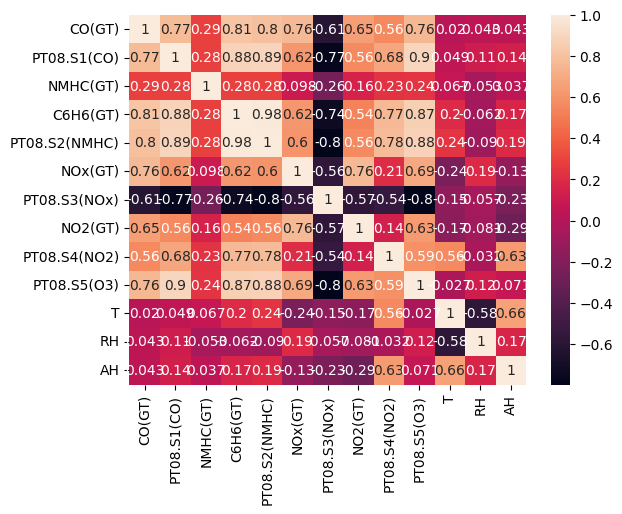

In [39]:
correlation_matrix = df_imputed.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

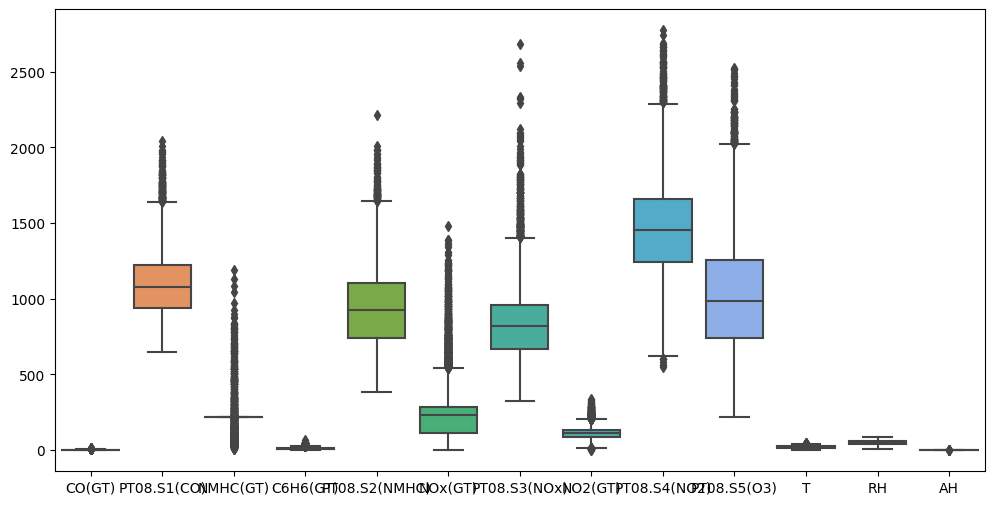

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_imputed)
plt.show()

In [42]:
z_scores = np.abs(zscore(df_imputed))
outliers = (z_scores > 3).all(axis=1)
df_no_outliers = df_imputed[~outliers]

In [43]:
X = df_no_outliers.drop('RH', axis=1)
y = df_no_outliers['RH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [44]:

X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]


theta = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train.values.reshape(-1, 1)


X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]


y_pred = X_test_bias @ theta

In [45]:


model = LinearRegression()

model.fit(X_train, y_train)


y_pred_sklearn = model.predict(X_test)


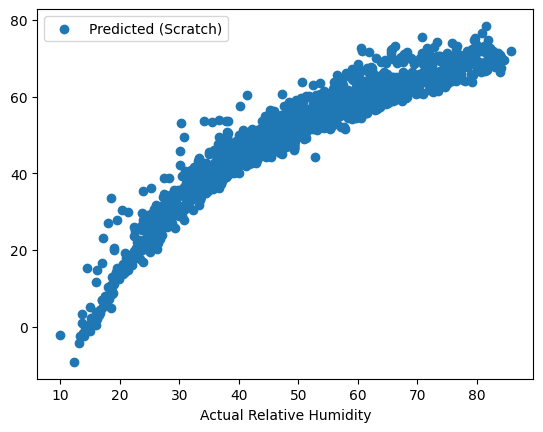

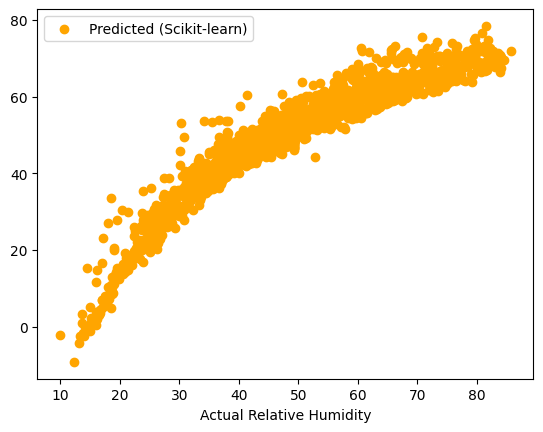

Results for the model from scratch:
R-squared: 0.8783286493602189
Mean Squared Error: 35.29631992266341

Results for the sklearn model:
R-squared: 0.8783286493602354
Mean Squared Error: 35.29631992265864


In [51]:



r2_np = r2_score(y_test, y_pred)
mse_np = mean_squared_error(y_test, y_pred)


r2_sklearn = model.score(X_test, y_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)


r2_scores = [r2_score_scratch, r2_score_sklearn]
mse_values = [mse_scratch, mse_sklearn]

plt.scatter(y_test, y_pred, label='Predicted (Scratch)')
plt.xlabel('Actual Relative Humidity')
plt.legend()
plt.show()

plt.scatter(y_test, y_pred_sklearn, label='Predicted (Scikit-learn)', color='orange')
plt.xlabel('Actual Relative Humidity')
plt.legend()
plt.show()
print("Results for the model from scratch:")
print(f"R-squared: {r2_np}")
print(f"Mean Squared Error: {mse_np}")

print("\nResults for the sklearn model:")
print(f"R-squared: {r2_sklearn}")
print(f"Mean Squared Error: {mse_sklearn}")